<a href="https://colab.research.google.com/github/royssentongo/Deep-Neural-Networks/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUILDING A NEURAL NETWORK

## Using Sequential method

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics # data ste is categorical in the y-variable thus need metrics for evaluating model performance

# Importing Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Checking the shape of the dataset
Xtrain.shape

(60000, 28, 28)

The Xtrain data has 60,000 pictures that are of 28 x 28 pixel dimensions

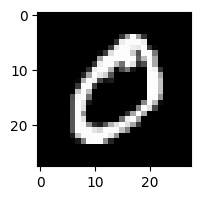

In [ ]:
# illustrating the second entry in Xtrain set
plt.figure(figsize=(2,2))
plt.imshow(Xtrain[1,:,:],cmap='gray')

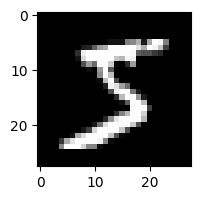

In [ ]:
# illustrating the first entry in Xtest set
plt.figure(figsize=(2,2))
plt.imshow(Xtrain[0,:,:],cmap='gray')

255 is the maximum value a pixel can have in an 8-bit storage system i.e. 2^8 = 256 thus the range is 0 (black) to 255 (white)

In [ ]:
# Viewing the number of entires in the ytrain set per class
pd.DataFrame(ytrain)[0].value_counts()

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [ ]:
# Changing the data from 28X28 pixel pictures to an array of vectors.columns.
# This is because the Deep Neural Network backend only can receive inputs as vectors

x_train = Xtrain.reshape(Xtrain.shape[0], (28*28)).astype('float32') #creating a single row and each
#                                                                     value in the matrix array of 28X28 into a column
#                                                                     Each row will be a new data entry/sample
x_test = Xtest.reshape(Xtest.shape[0], (28*28)).astype('float32')

In [ ]:
x_train.shape

(60000, 784)

Clearly, now I have created a data set that can actually be analysed with pixel of row 1, col 1 being column 1 and this repeats upon pixel in row 28, col 28 od each picture.

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
# We now have to standardize the data to be between 0 and 1 by dividing each entry by 255.
# This is to minimise the Diminishing Gradient Problem usually faced by Deep Neural Networks

x_train = x_train/255
x_test = x_test/255

In [ ]:
# We now have to do One-hot encoding of the y-variables.
# This will create a maximum value of 1 for each of the columns (0 to 9)
# and there by each row will have a total of all its columns as 1 and thus easy to transform into probabilities

y_train = keras.utils.to_categorical(ytrain,10) #One-Hot Encoding using Tensorflow
y_test = keras.utils.to_categorical(ytest,10)

In [ ]:
# Initiating the model
model1 = Sequential()

In [ ]:
# Defining the Neural Network
model1.add(Dense(784,activation = 'relu')) #This instructs that the first hidden layer will be
#                                           connected to all inputs and the ReLU activation function will be used
model1.add(Dense(100,activation = 'relu')) # The '100' instructs the second hidden layer to only pick 100 inputs from the
#                                           first hidden layer. The '100' and activation function choice are hyperparameters
#                                           that you can keep adjusting in a bid to find the combination that will minimise loss most
model1.add(Dense(10,activation='softmax')) # 10 is picked because we want an output layer of 10 neurons. Softmax is the final algorithm.

# 'Dense' ensures that all the neurons in the layer are connected to each of the neurons on the layer before and the layer after.

In [ ]:
# Compiling the model and defining what loss function to use.
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# The loss in categorical problems can be 'categorical_crossentropy, binary_crossentropy'.
# For regression problems, we use Mean sum of squared error.
# Metrics can be accuracy, recall, precision or F1-score based on the problem at hand.
# The optimizer function is what drives you to the minimum of the error function.

In [ ]:
model1.fit(x_train,y_train,epochs=10,batch_size=256, verbose = 1)
  # epochs; determines the number of time the model must read and re-read the data as it continuously fine tunes the
  #         parameters and errors made in the previous read. This allows for the model to learn all the patterns in the data.
  # batch_size; this tries to speed up processing time by breaking up the data into blocks (60,000/256 for this case) and
  #             these are feed into the model one at a time and at the end of reading all blocks, the model optimizes the
  #             parameters to minimize the error. each block is loaded into memory one at a time thus preventing an overload of
  #             memory when working on very large datasets.
  # Verbose; this specifies whether or not you did like to see the performance of each epochs iteration. verbose= 0 means you dont see

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8476 - loss: 0.5242
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9693 - loss: 0.1027
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9815 - loss: 0.0636
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9884 - loss: 0.0411
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9907 - loss: 0.0294
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9939 - loss: 0.0214
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9965 - loss: 0.0128
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9969 - loss: 0.0108
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9974 - loss: 0.0092
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9971 - loss: 0.0090


In [ ]:
# Evaluating model on Test set
loss, acc = model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Test Loss: %.3f' % loss)

Test Accuracy: 0.979
Test Loss: 0.115


In [ ]:
# Initiating the model2
model2 = Sequential()

In [ ]:
# Defining the Neural Network
model2.add(Dense(784,activation = 'sigmoid'))
model2.add(Dense(100,activation = 'sigmoid'))
model2.add(Dense(10,activation='softmax'))

In [ ]:
# Compiling the model and defining what loss function to use.
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(x_train,y_train,epochs=10,batch_size=256, verbose = 1)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7081 - loss: 1.1402
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9173 - loss: 0.2939
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9348 - loss: 0.2230
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9488 - loss: 0.1752
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9582 - loss: 0.1433
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9648 - loss: 0.1219
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9730 - loss: 0.0964
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9768 - loss: 0.0820
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9803 - loss: 0.0675
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9829 - loss: 0.0598


In [ ]:
# Evaluating model on Test set
loss, acc = model2.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Test Loss: %.3f' % loss)

Test Accuracy: 0.975
Test Loss: 0.080


Model2 of sigmoid Activation function has performed worse than model1 of ReLU function on the Test set due to a lower score on accuracy

In [ ]:
# getting the predictions of the model
y_predicted = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# getting the predicted pixel values of the first picture/data entry
y_predicted[0]

array([4.35427701e-11, 1.77408144e-09, 3.69747006e-08, 4.31214715e-07,
       7.36597808e-14, 6.19462676e-11, 2.33290317e-16, 9.99999464e-01,
       1.22385175e-11, 1.17644108e-08], dtype=float32)

In [ ]:
# getting the number denoted by the pixel values
np.argmax(y_predicted[0])

np.int64(7)

In [ ]:
# A better way to further verify the predictions is by using the confusion matrix on test set
from sklearn.metrics import confusion_matrix

# First Convert predicted probabilities to class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)
confusion_matrix(y_test.argmax(axis=1), y_predicted_labels) #y_test also needs to be converted to
#                                                            class label from one-hot encoded format


array([[ 974,    0,    1,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1128,    2,    0,    0,    1,    2,    1,    1,    0],
       [   1,    2, 1019,    1,    1,    0,    2,    4,    1,    1],
       [   0,    0,    6,  996,    0,    1,    0,    3,    2,    2],
       [   3,    1,    2,    1,  951,    1,    7,    2,    0,   14],
       [   2,    0,    0,   11,    0,  875,    2,    1,    1,    0],
       [   2,    2,    1,    0,    1,   11,  939,    0,    2,    0],
       [   0,    5,    9,    3,    0,    0,    0, 1004,    1,    6],
       [   1,    1,    3,   10,    2,    8,    1,    3,  940,    5],
       [   3,    2,    0,    6,    6,    2,    0,    6,    2,  982]])

Majority of the predictions are correct because the numbers along the diagonal are largest. The ones off the diagonal represent the errors.

In [ ]:
# Getting the precision and recall for each class
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



All the scores are greater than 95%

The scores were very high because the dataset was cleaned and thus free of noise. When datasets aren't cleaned, accuracy, recall and precision scores can plummet